# Okavango Delta case study
This data will be available as a preloaded Scenario ~~for the April launch~~ at some point  
Dataset shared post in [Basecamp thread](https://basecamp.com/1756858/projects/17536370/messages/95377082)  
This notebook analyzes the Okavango dataset using all the miscroservises outlined as python functions so far:  
- BLM calibration
- Solutions clustering
- Gap Analysis
- Unmet targtes pipeline
- Difference Map

Date: 14 April 2021  
Author: tamara.huete@vizzuality.com

### 1. Requirements

In [1]:
%run marxan_utils.ipynb

### 2. MARXAN folder and pu grid

In [2]:
MARXAN_FOLDER = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/Marxan_okavango_v5'

In [3]:
## pu grid
pu_area = gpd.read_file(f'{MARXAN_FOLDER}/pulayer/pu_base.shp')

In [4]:
pu_area.crs #3857 4326 para visualizar

<Projected CRS: PROJCS["Mollweide",GEOGCS["GCS_WGS_1984",DATUM["un ...>
Name: Mollweide
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mollweide
Datum: unknown
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [189]:
### Study area is inside Angola
gadm = gpd.read_file('/home/jovyan/work/datasets/data_for_features/gadm36_0.shp')
countries = gadm.GID_0.isin(['AGO','BWA','NAM','ZMB'])
bounding_box = pu_area.envelope
box = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry'])

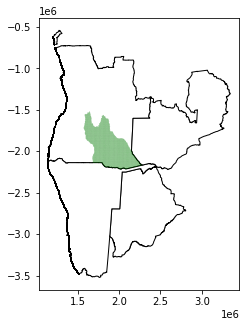

In [190]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
gadm[countries].to_crs(pu_area.crs).plot(ax=ax,edgecolor='black',color= 'white',)
pu_area.plot(ax=ax,color= 'green',alpha=0.5)
plt.show()

### 3. BLM calibration

 --> Running BLM_0.001...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/
 --> Running BLM_0.01...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 10 Best score: 239569
 --> Running BLM_0.1...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 6 Best score: 1.99897e+06
 --> Running BLM_1...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.

0.3971

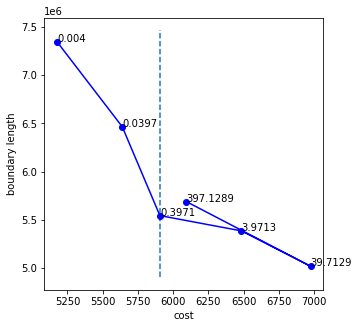

In [36]:
grid_file_path = f'{MARXAN_FOLDER}/pulayer/pu_base.shp'
BLM_calibration(MARXAN_FOLDER,'input.dat',grid_file_path )

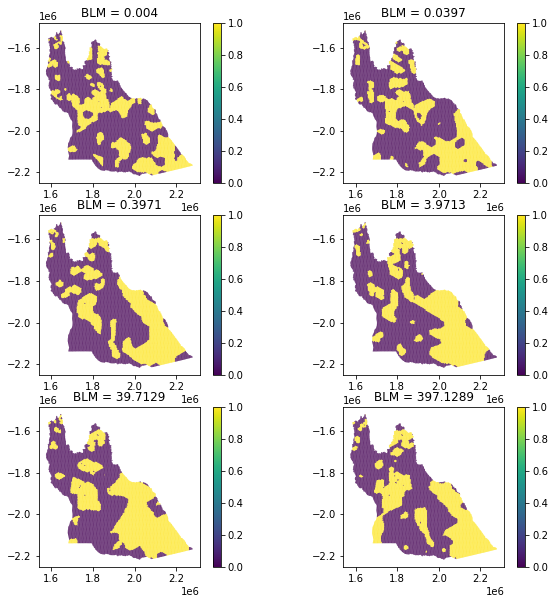

In [39]:
plotClumping(MARXAN_FOLDER,'input.dat',grid_file_path)

## Execute marxan

In [ ]:
#execute marxan
### With the new marxan: the file needs to be given access permision by typing in terminal
### $ chmod +x marxan
### Ideally include the optimum BLM that we had calculated
execute_marxan(MARXAN_FOLDER)

### SCENARIO OUTPUTS

### 1) Best solution/Indivdual solutions

<AxesSubplot:>

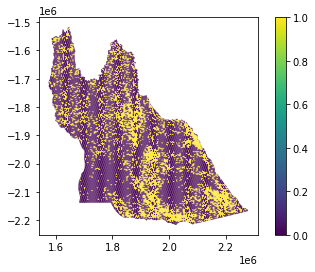

In [44]:
## Intersect best (or any individual solution) with PU grid
best = validateFile(MARXAN_FOLDER,'input.dat',OutputRun)
sol_grid = pu_area.merge(best,left_on='PU_ID',right_on = 'PUID',how='inner')
sol_grid.plot(column='SOLUTION', legend=True)

### 2) Frequency map

<AxesSubplot:>

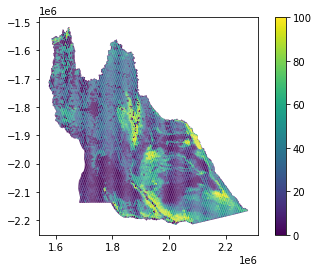

In [45]:
## Intersect with PU grid
freq = validateFile(MARXAN_FOLDER,'input.dat',OutputSsoln)
freq_grid = pu_area.merge(freq,left_on='PU_ID',right_on = 'planning_unit',how='inner')
freq_grid.plot(column='number', legend=True)

<AxesSubplot:>

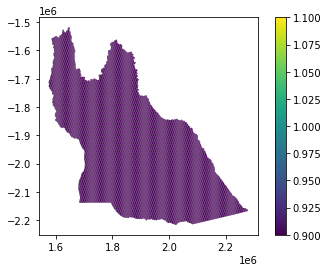

In [47]:
##Compare with cost surface
pu = validateFile(MARXAN_FOLDER,'input.dat',planningUnits)
cost = pu_area.merge(pu,left_on='PU_ID',right_on = 'id',how='inner')
cost.plot(column='cost',legend=True)

### 3) Solutions clustering

In [52]:
bestsols= clusterSolutions(MARXAN_FOLDER,'input.dat',k=5)
bestsols

Overall best solution is 83


[11, 50, 46, 56, 83]

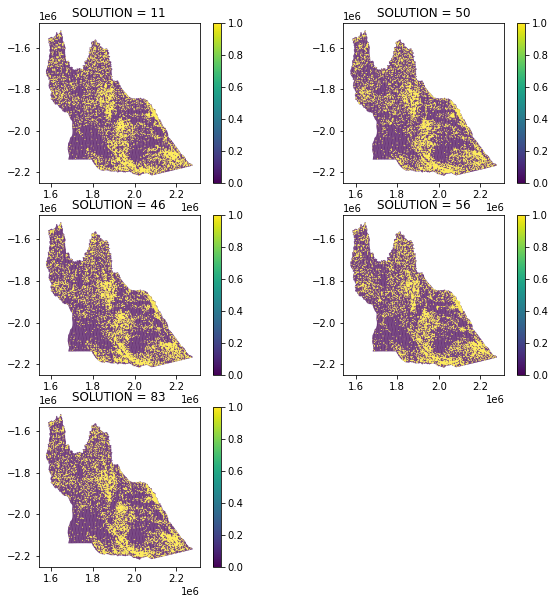

In [53]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig = plt.figure(figsize=(10,10))

for idx, sol in enumerate(bestsols):
    axn = fig.add_subplot(321+idx)
    solution = pd.read_csv(f"{MARXAN_FOLDER}/output/output_r{str(sol).zfill(5)}.csv")
    solution_grid = pu_area.merge(solution,left_on='PU_ID',right_on = 'PUID',how='inner')
    solution_grid.plot(ax=axn,column='SOLUTION', legend=True)
    axn.set_title(f'SOLUTION = {sol}')

#### Summary info 5 most different solutions

In [55]:
summary = validateFile(MARXAN_FOLDER,'input.dat',OutputSum)
sum_diff =summary[summary['Run_Number'].isin(bestsols)]
sum_diff

,Run_Number,Score,Cost,Planning_Units,Connectivity,Connectivity_Total,Connectivity_In,Connectivity_Edge,Connectivity_Out,Connectivity_In_Fraction,Penalty,Shortfall,Missing_Values,MPM
10,11,4369.96,4368.0,4368,36972400.0,111795000.0,14237500.0,36972400.0,60585400.0,0.127353,1.95902,26.251,1,0.0
45,46,4365.15,4363.0,4363,36540200.0,111795000.0,14412500.0,36540200.0,60842500.0,0.128919,2.15406,27.394,2,0.0
49,50,4370.32,4368.0,4368,36762400.0,111795000.0,14345000.0,36762400.0,60687800.0,0.128315,2.31539,29.151,2,0.0
55,56,4375.82,4373.0,4373,37266900.0,111795000.0,14124200.0,37266900.0,60404100.0,0.126340,2.81983,31.852,3,0.0
82,83,4360.20,4358.0,4358,36514500.0,111795000.0,14389300.0,36514500.0,60891500.0,0.128711,2.19766,28.846,1,0.0


### 4) Gap Analysis

In [90]:
df = gapAnalysis(MARXAN_FOLDER, 'input.dat')

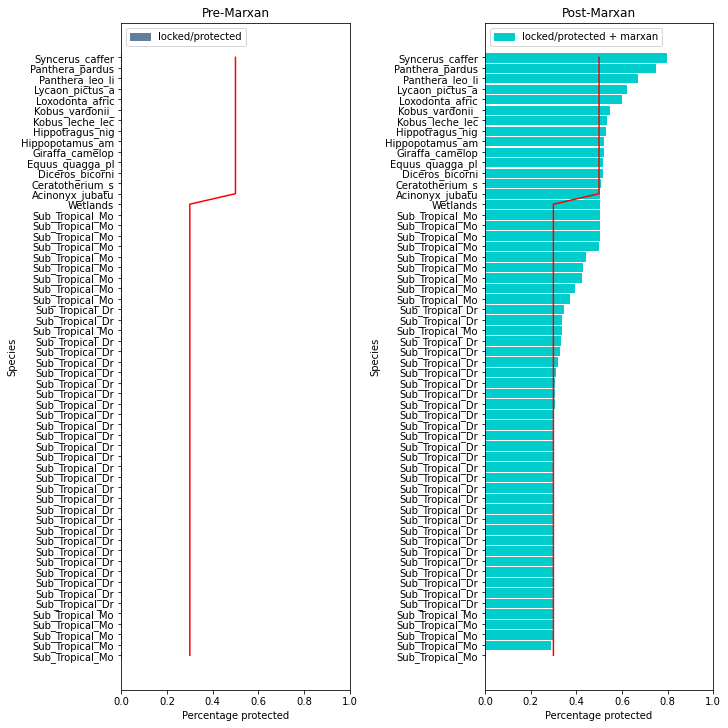

In [91]:
fig, anx = plt.subplots(nrows=1, ncols=2,figsize=(10,10), constrained_layout=True)
plotGap(df, 'Pre-Marxan', anx[0], post_marxan=False)
plotGap(df, 'Post-Marxan', anx[1], post_marxan=True)

### 5) Unmet targets pipeline

In [88]:
unmet = unmetDecisionTree(MARXAN_FOLDER, 'input.dat',
                      lock_out_limit=50, 
                      high_cost_quantile= 0.7, 
                      hcost_limit=20)

{25: '100.0 % in locked-out areas'}

In [ ]:
unmet

### 6) Difference Map

In [94]:
## 2 scenarios are needed, using the BLM examples
SCEN1_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/BLM_0.001'
SCEN2_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/BLM_100'
diff = diffMap(SCEN1_PATH,SCEN2_PATH, show_count =True)

there are 2214 pu's assigned to never
there are 189 pu's assigned to always
there are 81 pu's assigned to S1_always
there are 946 pu's assigned to S2_always
there are 889 pu's assigned to S1_only
there are 584 pu's assigned to S2_only
there are 4065 pu's assigned to both_comparable
there are 1675 pu's assigned to both_higherS1
there are 4487 pu's assigned to both_higherS2
there are 0 pu's not assigned


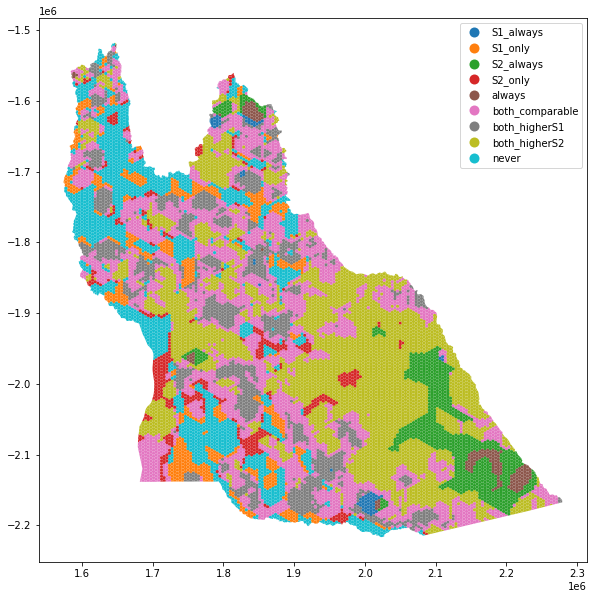

In [102]:
GRID_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/BLM_0.001/pulayer/pu_base.shp'
plotDiffMap(diff,GRID_PATH, solid= True )

## Repeat modifying pu status

In [ ]:
MARXAN_FOLDER = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/Marxan_okavango_v5'
MARXAN_INPUTDATA = 'input.dat'

In [ ]:
pumock = modify_pu_status(MARXAN_FOLDER,MARXAN_INPUTDATA,percentage= 0.3, lock_out =True)

In [150]:
userInput = readInput(MARXAN_FOLDER,MARXAN_INPUTDATA)
userInput.PUNAME = 'pumock.dat'
userInput.OUTPUTDIR = 'output_mock'
os.mkdir(f'{MARXAN_FOLDER}/{userInput.OUTPUTDIR}')
saveInput(MARXAN_FOLDER,MARXAN_INPUTDATA,userInput)

In [ ]:
execute_marxan(MARXAN_FOLDER)

In [152]:
bestsols= clusterSolutions(MARXAN_FOLDER,'input.dat',k=5)
bestsols

Overall best solution is 1


[32, 45, 1, 66, 89]

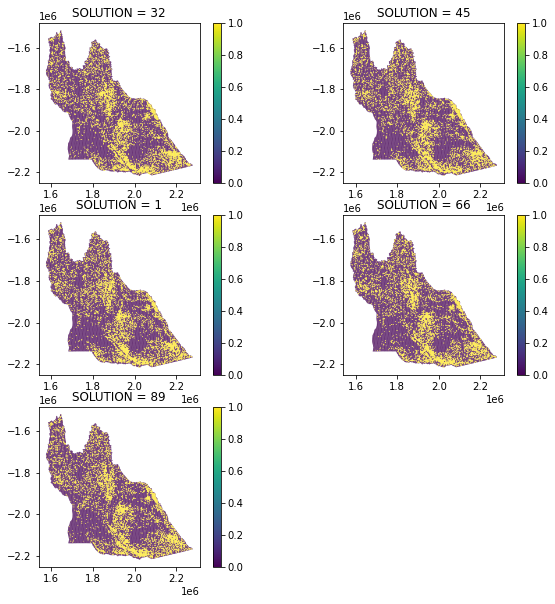

In [153]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig = plt.figure(figsize=(10,10))

for idx, sol in enumerate(bestsols):
    axn = fig.add_subplot(321+idx)
    solution = pd.read_csv(f"{MARXAN_FOLDER}/output/output_r{str(sol).zfill(5)}.csv")
    solution_grid = pu_area.merge(solution,left_on='PU_ID',right_on = 'PUID',how='inner')
    solution_grid.plot(ax=axn,column='SOLUTION', legend=True)
    axn.set_title(f'SOLUTION = {sol}')

In [154]:
df = gapAnalysis(MARXAN_FOLDER, 'input.dat')

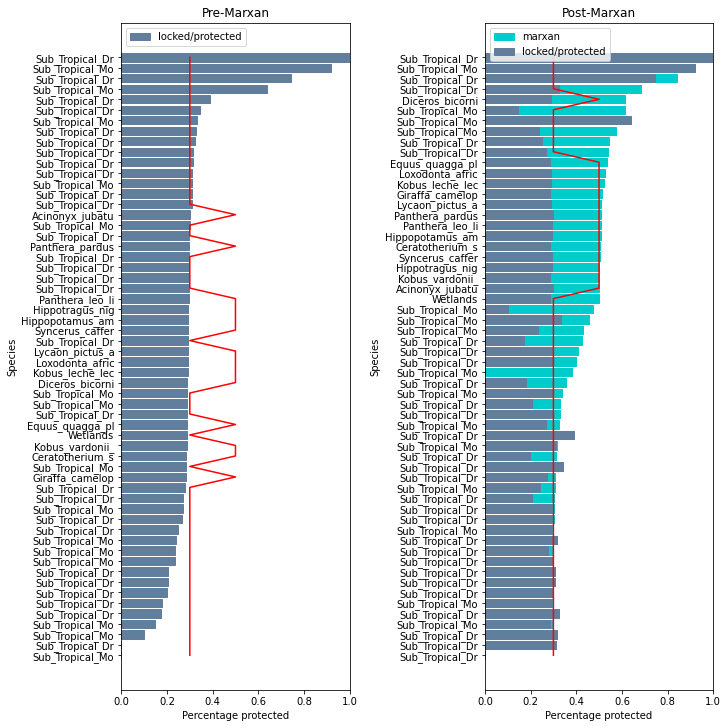

In [196]:
fig, anx = plt.subplots(nrows=1, ncols=2,figsize=(10,10), constrained_layout=True)
plotGap(df, 'Pre-Marxan', anx[0], post_marxan=False)
plotGap(df, 'Post-Marxan', anx[1], post_marxan=True)

In [156]:
unmetDecisionTree(MARXAN_FOLDER, 'input.dat',
                      lock_out_limit=50, 
                      high_cost_quantile= 0.7, 
                      hcost_limit=20)

{25: '100.0 % in locked-out areas'}

In [197]:
## 2 scenarios are needed, using the BLM examples
SCEN1_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/Marxan_okavango_v5'
SCEN2_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/BLM_100'
diff = diffMap(SCEN1_PATH,SCEN2_PATH, show_count =True)

there are 632 pu's assigned to never
there are 167 pu's assigned to always
there are 2149 pu's assigned to S1_always
there are 968 pu's assigned to S2_always
there are 1991 pu's assigned to S1_only
there are 1980 pu's assigned to S2_only
there are 1552 pu's assigned to both_comparable
there are 664 pu's assigned to both_higherS1
there are 5027 pu's assigned to both_higherS2
there are 0 pu's not assigned


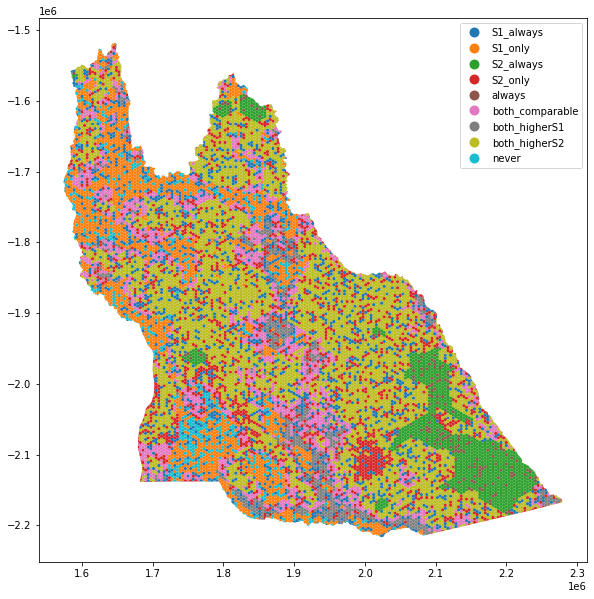

In [198]:
GRID_PATH = '/home/jovyan/work/datasets/raw/demo_marxan_okavango/BLM_0.001/pulayer/pu_base.shp'
plotDiffMap(diff,GRID_PATH, solid= True )